## WRF Hyrdo from files to hydropower predictions

This file takes the WRF data and extracts runoff, comapres it with ERA runoff, and generates predictions of hydropower using Hari's regession model

In [1]:
import os
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import regionmask
import xarray as xr
import numpy as np

In [2]:
import seaborn as sns

In [3]:
GCM='miroc6_r1i1p1f1_ssp370_bc' 
gcm_name = 'miroc6'

### Step 1. Read in WRF Data and Concatinate 

In [4]:
def New_WRFHydro_readin(year):
    #open dataset
    print(year)
    ds = xr.open_dataset(fr"/nfs/turbo/seas-mtcraig-climate/WRFDownscaled/{GCM}/{year}/regrid_{year}_ssp370_d02.nc")
    #realign times 
    start_time = pd.Timestamp(f'{year}-09-01 00:00')
    times = pd.date_range(start=start_time, periods=len(ds.Times), freq='h')
    ds['Times'] = times
    #remove last hour of data because there is one hour of the next september 
    ds = ds.isel(Times=slice(None, -1))
    
    #resampling runoff
    ds['ro'] = (ds['RUNSB'] + ds['RUNSF'])
    ro_monthly_avg = (ds['ro'].resample(Times = '1M', label = 'left').mean())*24*3600/1e3
    ro_monthly_avg['RUNSB'] = (ds['RUNSB'].resample(Times = '1M', label = 'left').mean())*24*3600/1e3
    ro_monthly_avg['RUNSF'] = (ds['ro'].resample(Times = '1M', label = 'left').mean())*24*3600/1e3
    
    '''
    #create total runoff in m/h 
    ds['ro'] = (ds['RUNSB'] + ds['RUNSF'])*3600/1000
    ds['ro'].assign_attrs(units = 'm/h') 
    #resample to m/day by summing hourly 
    ds_daily_ro = ds['ro'].resample(Times = '1D', label = 'left').sum()
    #resample to monthly average m/day by taking average of m/day 
    # Resample to monthly, using the right label to represent each month's data
    ro_monthly_avg = ds_daily_ro.resample(Times='M', label='right').mean()
    # Shift the monthly times to the first day of the next month
    ro_monthly_avg['Times'] = ro_monthly_avg['Times'].to_index() - pd.offsets.MonthBegin(1)
    '''
    return ro_monthly_avg 

In [5]:
# List of years to process
years = list(range(2024, 2063))

# Run the function for each year and stPDF ore the results in a list
monthly_data_list = [New_WRFHydro_readin(str(year)) for year in years]

# Concatenate the results along the 'Times' dimension
#wrf = xr.concat(monthly_data_list, dim='Times')

2024


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2025


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2026


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2027


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2028


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2029


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2030


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2031


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2032


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2033


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2034


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2035


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2036


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2037


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2038


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2039


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2040


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2041


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2042


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2043


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2044


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2045


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2046


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2047


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2048


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2049


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2050


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2051


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2052


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2053


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2054


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2055


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2056


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2057


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2058


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2059


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2060


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2061


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


2062


/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
/home/mlchris/tensorflow-env/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [6]:
wrf = xr.concat(monthly_data_list, dim='Times')

### Step 2. Read in ERA5 Data for Comparisons 

In [7]:
era5 = xr.open_dataset(r"/nfs/turbo/seas-mtcraig/sriharis/era5_runoff/runoff_monthly_avg.nc")
era5= era5.isel(time = slice(165,240))
#era5

### Step 3. Plots for Runoff Comparion 

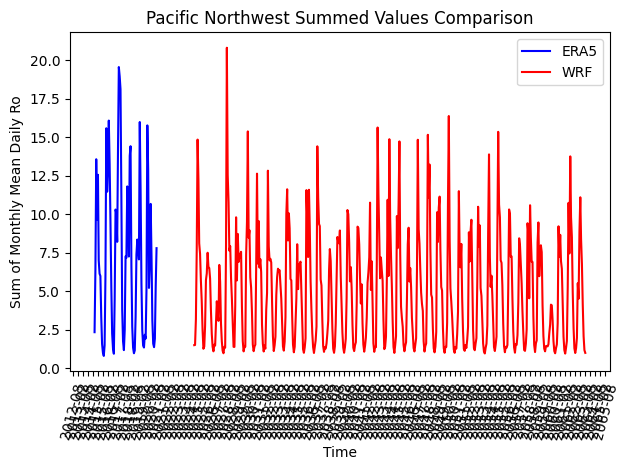

In [8]:
# Define the Pacific Northwest boundaries in degrees
lat_lower = 42.0
lat_upper = 49.0
lon_lower = -125.0
lon_upper = -117.0

# Sum over the Pacific Northwest for each time step for both datasets
pnw_sum_1 = era5.ro.sel(latitude=slice(lat_upper, lat_lower), longitude=slice(lon_lower, lon_upper)).sum(dim=['latitude', 'longitude'])
pnw_sum_2 = wrf.sel(lat=slice(lat_lower, lat_upper), lon=slice(lon_lower, lon_upper)).sum(dim=['lat', 'lon'])

# Plot the time series for both datasets
fig, ax = plt.subplots()

# Plot the first dataset with a label for the legend
pnw_sum_1.plot(ax=ax, label='ERA5', color='blue')

# Plot the second dataset with a label for the legend
pnw_sum_2.plot(ax=ax, label='WRF', color='red')

# Setup the appearance of the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval =6))
plt.xticks(rotation=75)

# Add the legend to differentiate the two datasets
plt.legend()

plt.title('Pacific Northwest Summed Values Comparison')
plt.xlabel('Time')
plt.ylabel('Sum of Monthly Mean Daily Ro')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

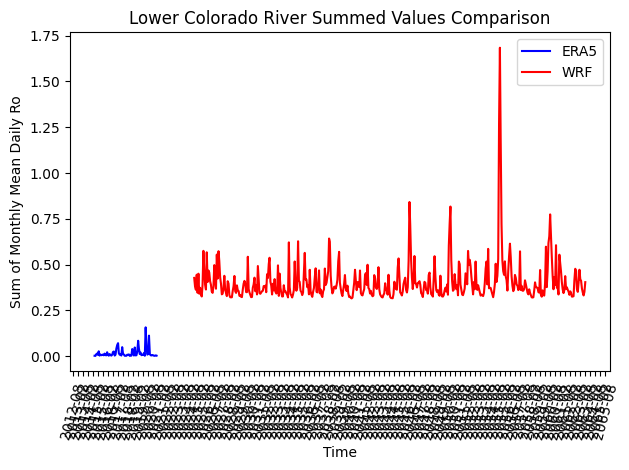

In [9]:
# Define the Lower Colorado River Boundaries 
#-115.33596549,   32.87847603, -111.5060979 ,   36.88857647]
lat_lower = 32.87847603
lat_upper = 36.88857647
lon_lower = -115.33596549
lon_upper = -111.5060979

# Sum over the Pacific Northwest for each time step for both datasets
pnw_sum_1 = era5.ro.sel(latitude=slice(lat_upper, lat_lower), longitude=slice(lon_lower, lon_upper)).sum(dim=['latitude', 'longitude'])
pnw_sum_2 = wrf.sel(lat=slice(lat_lower, lat_upper), lon=slice(lon_lower, lon_upper)).sum(dim=['lat', 'lon'])

# Plot the time series for both datasets
fig, ax = plt.subplots()

# Plot the first dataset with a label for the legend
pnw_sum_1.plot(ax=ax, label='ERA5', color='blue')

# Plot the second dataset with a label for the legend
pnw_sum_2.plot(ax=ax, label='WRF', color='red')

# Setup the appearance of the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval =6))
plt.xticks(rotation=75)

# Add the legend to differentiate the two datasets
plt.legend()

plt.title('Lower Colorado River Summed Values Comparison')
plt.xlabel('Time')
plt.ylabel('Sum of Monthly Mean Daily Ro')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [10]:
import matplotlib.pyplot as plt

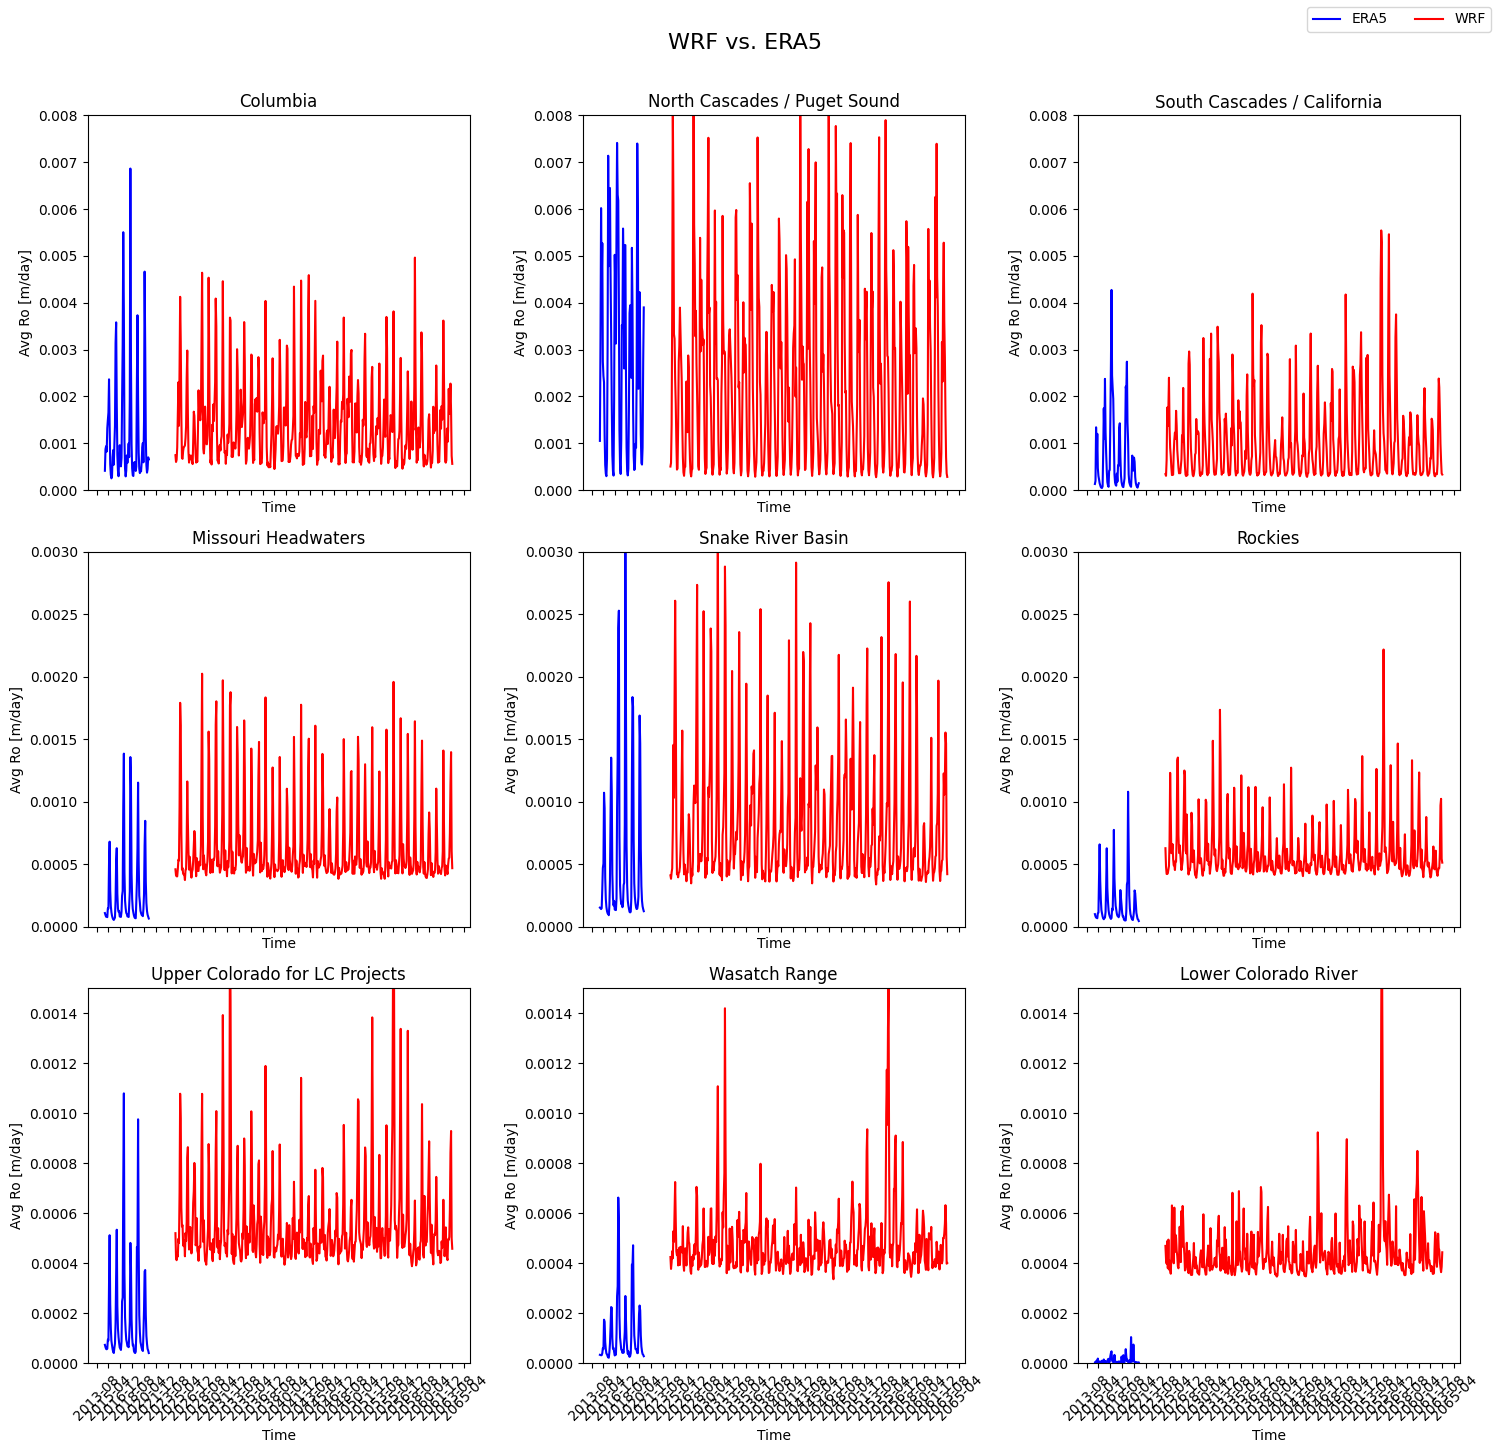

In [11]:
# Define your list of region boundaries with names
regions_boundaries = [
    # (name, lon_lower, lat_lower, lon_upper, lat_upper)
    ['Columbia', -122.10486509,   45.10560657, -112.29323022,   52.88065373],
    ['North Cascades / Puget Sound', -124.9022044 ,  43.22150988, -120.65459446,  49.3133938],
    ['South Cascades / California',-124.5351239 ,   34.77516507, -117.648714  ,   43.59734405],
    ['Missouri Headwaters',-113.9381413 ,   40.32321311, -104.51545227,   49.0010015],   
    ['Snake River Basin',-119.07598267,   41.12782617, -109.76249144,   47.63245548],
    ['Rockies', -109.67913637,   35.55836156, -103.83935388,   41.64202473],
    ['Upper Colorado for LC Projects',-112.32864202,   35.73596328, -107.07268614,   43.4521802],
    ['Wasatch Range',-114.47345667,   36.52387752, -110.59847552,   42.85578334],# Example 2
    ['Lower Colorado River', -115.33596549, 32.87847603, -111.5060979, 36.88857647]  # Example 1
    # ... add more regions with their names and boundaries
]

# Assume era5 and wrf are your pre-loaded datasets
# (not shown here, please ensure they are loaded correctly)

row_y_axis_limits = [
    (0, .008),  # Limits for the first row
    (0, .003),  # Limits for the second row
    (0, .0015),  # Limits for the third row
]

# Create a figure with 9 subplots arranged in 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the defined regions and plot the time series for each
for i, (ax, (region_name, lon_lower, lat_lower, lon_upper, lat_upper)) in enumerate(zip(axes, regions_boundaries)):
    # Sum over the current region for each time step for both datasets
    region_era = era5.ro.sel(latitude=slice(lat_upper, lat_lower), longitude=slice(lon_lower, lon_upper)).mean(dim=['latitude', 'longitude'])
    region_wrf = wrf.sel(lat=slice(lat_lower, lat_upper), lon=slice(lon_lower, lon_upper)).mean(dim=['lat', 'lon'])
    
    # Plot the time series for both datasets on the current axes
    region_era.plot(ax=ax, label='ERA5', color='blue')
    region_wrf.plot(ax=ax, label='WRF', color='red')

    # Setup the appearance of the x-axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval =20))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', which='major', labelsize=10, rotation=45) 
    
     # Set y-axis limits based on the row
    row_index = i // 3  # Integer division to determine row number
    ax.set_ylim(row_y_axis_limits[row_index])

    # Set title for each subplot with the region's name
    ax.set_title(region_name)

    # Set the labels for each subplot
    ax.set_xlabel('Time')
    ax.set_ylabel('Avg Ro [m/day]')

# Add a global figure legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2)

# Adjust the layout to make room for titles and x-ticks
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust if the legend/title overlap

fig.suptitle('WRF vs. ERA5', fontsize=16)
 
# Show the plot
#plt.show()

plt.savefig("Runoff_compare_TAI.png")

### Step 4. Get water year (Oct-Sept) sums for each region to feed into regression

In [12]:
# Load your shapefile with regions - replace with your file path
shapefile_path = r"/nfs/turbo/seas-mtcraig/sriharis/shapefiles/drought_region_shape/drought_region_shape/Drought_region_shapes_v2.shp"
pnnl_hydro = gpd.read_file(shapefile_path)
drought_shapes = pnnl_hydro.dissolve(by='drght_r', aggfunc='sum', as_index=False)

# Optional: Dissolve polygons by a specified field if necessary
# regions_gdf = regions_gdf.dissolve(by='your_dissolve_field')

# Project shapefile to match the coordinate system of the xarray DataArray
# depending on your shapefile and data, you may need to change the EPSG code
drought_shapes = drought_shapes.to_crs('epsg:4326')


# Define a regionmask from the polygons in the shapefile, matching the Dataset's dimensions
regions = regionmask.Regions( drought_shapes.geometry.tolist(), name='regions', numbers=list(range(len(drought_shapes))), names=drought_shapes['drght_r'])


def get_regional_water_yrs(wrf):
    # Make sure your dataset has 'lat' and 'lon' coordinates
    # if not, you will need to adjust the coordinate names accordingly
    # Create a mask from the Regions object using the dataset's lon and lat
    mask = regions.mask(wrf.lon, wrf.lat)

    # Apply the mask to your data array - replace 'data_variable' with your data variable name
    da_masked = wrf.where(~mask.isnull())

    #unstack 
    #da_masked = da_masked.unstack('stacked_lat_lon')

    # Calculate regional averages for each time step
    region_avg = da_masked.groupby(mask).mean()

    # Create a 'water_year' coordinate by shifting the October-December months to the next year
    # and using just the year part for our new coordinate
    region_avg['water_year'] = region_avg['Times'].dt.year + (region_avg['Times'].dt.month >= 10).astype(int)
    
    # Group by 'water_year' and mean across the 'Times' dimension for each mask value
    annual_sum = region_avg.groupby('water_year').mean(dim='Times') #ACTUALLY A MEAN
    
    #organize into dataframe with year and region 
    region_names = [region for region in regions.names]
    # Map mask numbers to region names
    mask_to_region = {i: name for i, name in enumerate(region_names)}
    #Convert the xarray.DataArray to a pandas DataFrame
    df = annual_sum.to_dataframe('ro')  # 'ro' is the name for the data variable
    # Make sure 'mask' is a column and not an index
    if 'mask' not in df.columns:
        df.reset_index(inplace=True)
    # Apply the mapping on the 'mask' column to create a new 'region' column
    df['region'] = df['mask'].map(mask_to_region)
    # Drop the 'mask' column
    df = df.drop(columns='mask')
    
    #remove incomplete water years
    grouped = region_avg.groupby('water_year') 
    complete_water_years = []
    for name, group in grouped:
        months = group['Times'].dt.month.values
        if len(months) == 12 and set(months) == set(range(1, 13)):
            complete_water_years.append(name)
    # Filter out the rows corresponding to incomplete water years
    df = df[df['water_year'].isin(complete_water_years)]
    return df

def ERA5get_regional_water_yrs(era5):
    # Make sure your dataset has 'lat' and 'lon' coordinates
    # if not, you will need to adjust the coordinate names accordingly
    # Create a mask from the Regions object using the dataset's lon and lat
    mask = regions.mask(era5.longitude, era5.latitude)

    # Apply the mask to your data array - replace 'data_variable' with your data variable name
    da_masked = era5.where(~mask.isnull())

    #unstack 
    #da_masked = da_masked.unstack('stacked_lat_lon')

    # Calculate regional averages for each time step
    region_avg = da_masked.groupby(mask).mean()

    # Create a 'water_year' coordinate by shifting the October-December months to the next year
    # and using just the year part for our new coordinate
    region_avg['water_year'] = region_avg['time'].dt.year + (region_avg['time'].dt.month >= 10).astype(int)

    # Group by 'water_year' and sum across the 'Times' dimension for each mask value
    annual_sum = region_avg.groupby('water_year').mean(dim='time')#ACTUALLY A MEAN
    
    #organize into dataframe with year and region 
    region_names = [region for region in regions.names]
    # Map mask numbers to region names
    mask_to_region = {i: name for i, name in enumerate(region_names)}
    #Convert the xarray.DataArray to a pandas DataFrame
    df = annual_sum.to_dataframe('ro')  # 'ro' is the name for the data variable
    # Make sure 'mask' is a column and not an index
    if 'mask' not in df.columns:
        df.reset_index(inplace=True)
    # Apply the mapping on the 'mask' column to create a new 'region' column
    df['region'] = df['mask'].map(mask_to_region)
    # Drop the 'mask' column
    df = df.drop(columns='mask')
    return df

##### ERA5 Water Years

In [13]:
era5_annual = ERA5get_regional_water_yrs(era5['ro'])

##### WRF Water Years

In [14]:
annual_runoff_sums = get_regional_water_yrs(wrf)

In [15]:
annual_runoff_sums = annual_runoff_sums.set_index('region')

### Step 5. Plot Water Year Runnoff Sums to Compare

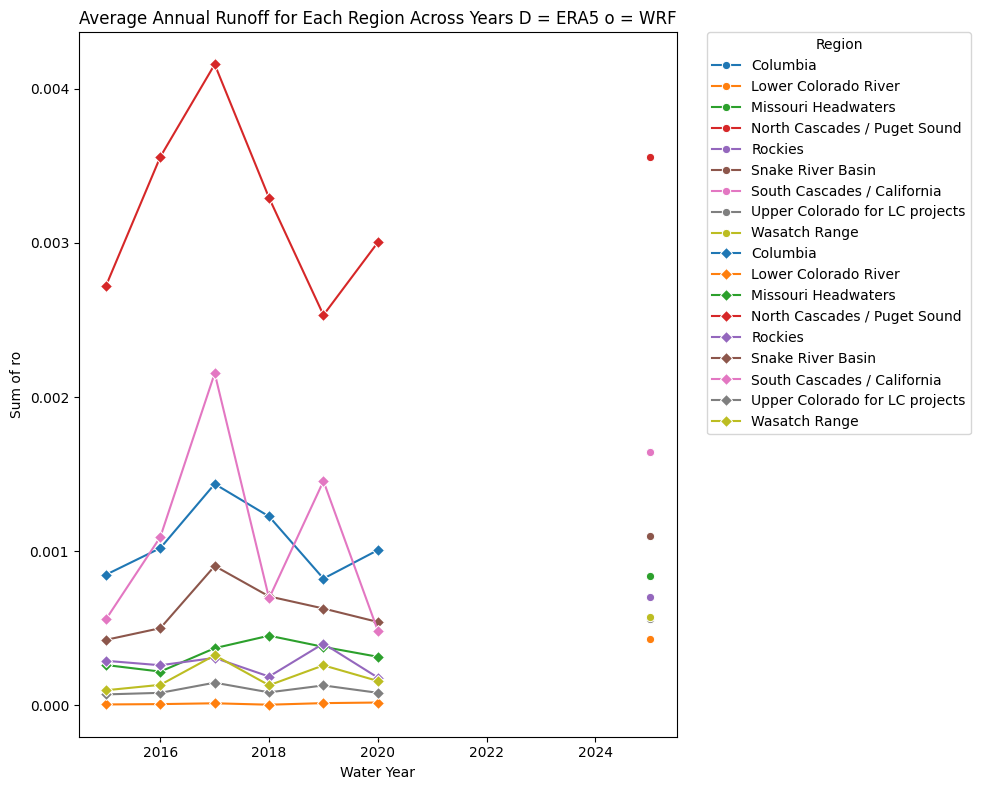

In [16]:
import seaborn as sns

# Filter the data to include only the years 2020 through 2025
filtered_data = annual_runoff_sums[(annual_runoff_sums['water_year'] >= 2020) & (annual_runoff_sums['water_year'] <= 2025)]
era5_filtered = era5_annual[(era5_annual['water_year'] >= 2015) & (era5_annual['water_year'] <= 2020)]

# Create the plot
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.lineplot(data=filtered_data, x='water_year', y='ro', hue='region', marker='o')
sns.lineplot(data=era5_filtered, x = 'water_year', y = 'ro', hue = 'region', marker = 'D')

plt.title('Average Annual Runoff for Each Region Across Years D = ERA5 o = WRF')  # Set the title of the plot
plt.xlabel('Water Year')  # Set the x-axis label
plt.ylabel('Sum of ro')  # Set the y-axis label
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place the legend outside the plot

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

### Step 6. Run the Regression Model with Water Years

In [17]:
# Create an empty dictionary to hold the individual region DataFrames
region_dfs = {}

# Get the unique regions and create a DataFrame for each
for region in annual_runoff_sums.index.unique():
    region_dfs[region] = annual_runoff_sums[annual_runoff_sums.index == region].copy()

In [18]:
#import models 
import pickle
with open('trained_regressions_hydro.pkl', 'rb') as file:
    # Load the data from the pickled file
    model = pickle.load(file)

/home/mlchris/tensorflow-env/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.1.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [19]:
#prediction 
for key in region_dfs:
    region_dfs[key]['hydro_power (MWh)'] = model[key].predict(region_dfs[key][['ro']])

In [20]:
#organizing predictions into an xarray 
hydro_power_dataarrays = []

for dr_region, df in region_dfs.items():
    # Let's make sure we have the correct types here
    df['water_year'] = df['water_year'].astype(int)
    df['hydro_power (MWh)'] = df['hydro_power (MWh)'].astype(float)

    # Make 'year' the defining coordinate for this array, and rename 'region' to 'dr_region'
    hydro_power_dataarrays.append(xr.DataArray(
        df['hydro_power (MWh)'],
        dims=['year'],
        coords={'year': df['water_year']},
        name='hydro_power'
    ).expand_dims({'dr_region': [dr_region]}))

# Combine all the single-region DataArrays into one multi-region DataArray
hydro_power_xr = xr.concat(hydro_power_dataarrays, dim='dr_region')

In [21]:
hydro_power_xr.to_netcdf('tai_hydro.nc')

### Step 7. Plotting Predictions

In [22]:
#importing nice plotting 
import hvplot.xarray
hvplot.extension('matplotlib')

#### Copied from Hari's Code to get plot of historic data

In [2]:
wecc_subregions = gpd.read_file(r"/nfs/turbo/seas-mtcraig/sriharis/shapefiles/WECC_subregions/WECC_subregions.shp")
drought_shapes_plantID = gpd.read_file('/nfs/turbo/seas-mtcraig/sriharis/paper2_archive/hydro_generation/drought_region_shape/Drought_region_shapes_v2_plantID.shp')

hyd = pd.read_csv(r"/nfs/turbo/seas-mtcraig/sriharis/paper2_archive/hydro_generation/RectifHyd_v1.0.1.csv",skiprows=28)

hyd['datetime'] = pd.to_datetime(hyd['year'].astype(str)+'/'+hyd['month'])

hyd = hyd.set_index(['EIA_ID','datetime'])

hydro_locs = pd.read_csv('/nfs/turbo/seas-mtcraig/sriharis/paper2_archive/hydro_generation/hydro_locs.csv',index_col='Plant Code')
hydro_locs.index=hydro_locs.index.astype(int)

# Find plants which are in both rectifhyd and wecc hydro dataset
hyd_ids = np.unique(hyd.index.get_level_values('EIA_ID'))
eia_latlon_ids = np.array(hydro_locs.index)
reqd_plants = hyd_ids[np.isin(hyd_ids,eia_latlon_ids)==True] 

from shapely.geometry import Point

def find_shape_region_coord(lon,lat,shpfile,shp_colname):
    """
    Find the shape to which a coordinate (of power plant)
    belongs

    In:
        lon : longitude (-180 to 180)
        lat : latitude
        shpfile : drought region geopandas object
        shp_colname : required name of the shape
    
    Out: 
        drought region name to which the plant belongs
    """    
    min_dist = 1e10

    for idx,polygon in enumerate(np.asanyarray(shpfile['geometry'])):
        if polygon.contains(Point(lon,lat)):
            return shpfile.iloc[idx][shp_colname]

    return 'None'
    
# Find the plants which are in the specific drought regions
# There are a couple methods, here only the methods which gives plants within the drought region shape file is used
reqd_plants_df = hydro_locs.loc[reqd_plants]
reqd_plants_df['drought_region'] = reqd_plants_df.apply(lambda x:find_shape_region_coord(x['Longitude'],
                                                                                         x['Latitude'],
                                                                                         drought_shapes_plantID,
                                                                                         'drght_r'), axis=1)
reqd_plants_df['WECC_region'] = reqd_plants_df.apply(lambda x:find_shape_region_coord(x['Longitude'],
                                                                                         x['Latitude'],
                                                                                         wecc_subregions,
                                                                                         'Region_Lab'), axis=1)

rectifhyd_ds = hyd.loc[reqd_plants][['EIA_MWh', 'RectifHyd_MWh']].to_xarray()

rectifhyd_ds = rectifhyd_ds.assign_coords({"lat":("EIA_ID",reqd_plants_df['Latitude']),
                                           "lon":("EIA_ID",reqd_plants_df['Longitude']),
                                           "dr_region":("EIA_ID",reqd_plants_df['drought_region']),
                                           "WECC_region":("EIA_ID",reqd_plants_df['WECC_region'])        
                                          }
                                         )

rectifhyd_ds_none = rectifhyd_ds.where(rectifhyd_ds['dr_region']=='None',drop=True)
rectifhyd_ds = rectifhyd_ds.where(rectifhyd_ds['dr_region']!='None',drop=True)

dr_region_total_gen = rectifhyd_ds.groupby('dr_region').sum()['RectifHyd_MWh'].rename({'datetime':'time'})
dr_region_annual_gen = dr_region_total_gen.rolling(time=12).sum().compute()
dr_region_annual_gen = dr_region_annual_gen.where(dr_region_annual_gen.time.dt.month==9,drop=True)

WECC_region_total_gen = rectifhyd_ds.groupby('WECC_region').sum()['RectifHyd_MWh'].rename({'datetime':'time'})
WECC_region_annual_gen = WECC_region_total_gen.rolling(time=12).sum().compute()
WECC_region_annual_gen = WECC_region_annual_gen.where(WECC_region_annual_gen.time.dt.month==9,drop=True)

#Want the fraction of mean generation which each plant contributes to the region over the 20 years.
plant_fractions = (rectifhyd_ds.mean('datetime').groupby('dr_region')\
                   /rectifhyd_ds.groupby('dr_region').sum().mean('datetime')).to_dataframe()
plant_fractions = plant_fractions.rename({'EIA_MWh':'EIA_fraction',
                                          'RectifHyd_MWh':'RectifHyd_fraction'},
                                         axis=1)[['EIA_fraction','RectifHyd_fraction','dr_region','WECC_region']]

rectifhyd_ds = rectifhyd_ds.rename_vars({'RectifHyd_MWh': 'hydro_power'})





/tmp/ipykernel_1250427/3382940119.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hyd['datetime'] = pd.to_datetime(hyd['year'].astype(str)+'/'+hyd['month'])


In [6]:
rectifhyd_ds

<xarray.Dataset> Size: 2MB
Dimensions:      (EIA_ID: 574, datetime: 240)
Coordinates:
  * EIA_ID       (EIA_ID) int64 5kB 34 72 152 153 ... 61190 61191 61688 61853
  * datetime     (datetime) datetime64[ns] 2kB 2001-01-01 ... 2020-12-01
    lat          (EIA_ID) float64 5kB 39.13 34.01 35.2 36.94 ... 38.4 43.05 40.6
    lon          (EIA_ID) float64 5kB -121.0 -118.4 -114.6 ... -114.6 -111.4
    dr_region    (EIA_ID) object 5kB 'South Cascades / California' ... 'Wasat...
    WECC_region  (EIA_ID) object 5kB 'CAMX' 'CAMX' ... 'NWPP Central'
Data variables:
    EIA_MWh      (EIA_ID, datetime) float64 1MB 1.014e+03 ... 3.492e+03
    hydro_power  (EIA_ID, datetime) float64 1MB 4.05e+03 4.949e+03 ... 2.051e+03

In [20]:
rectifhyd_ds.sel(EIA_ID = 61688).isel(datetime = slice(216,228))

<xarray.Dataset> Size: 328B
Dimensions:      (datetime: 12)
Coordinates:
    EIA_ID       int64 8B 61688
  * datetime     (datetime) datetime64[ns] 96B 2019-01-01 ... 2019-12-01
    lat          float64 8B 43.05
    lon          float64 8B -114.6
    dr_region    object 8B 'Snake River Basin'
    WECC_region  object 8B 'NWPP Central'
Data variables:
    EIA_MWh      (datetime) float64 96B 345.5 362.7 404.0 ... 343.7 320.7 275.7
    hydro_power  (datetime) float64 96B 280.6 287.7 553.0 ... 346.8 287.3 291.5

#### Creating historic and future plots to compare

In [24]:
rect_plot = rectifhyd_ds.groupby(rectifhyd_ds.datetime.dt.year).sum('datetime')['hydro_power'].groupby('dr_region').sum().hvplot(by='dr_region', legend = 'left')

In [25]:
wrf_plot = hydro_power_xr.hvplot(by='dr_region', legend = 'right').opts(title="RectifHyd Historic Hydro Power")

:NdOverlay   [dr_region]
   :Curve   [year]   (hydro_power)
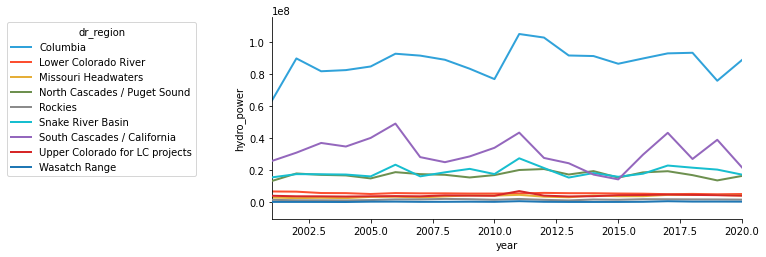

In [26]:
rect_plot

:NdOverlay   [dr_region]
   :Curve   [year]   (hydro_power)
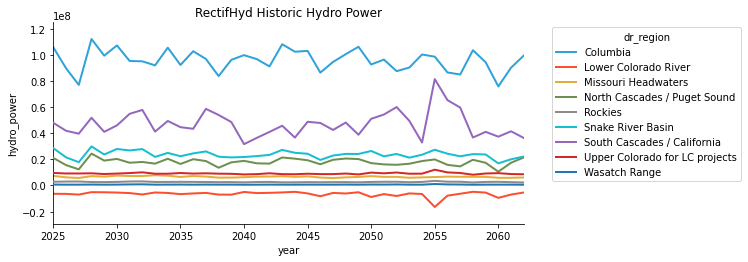

In [27]:
wrf_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [dr_region]
      :Curve   [year]   (hydro_power)
   .NdOverlay.II :NdOverlay   [dr_region]
      :Curve   [year]   (hydro_power)
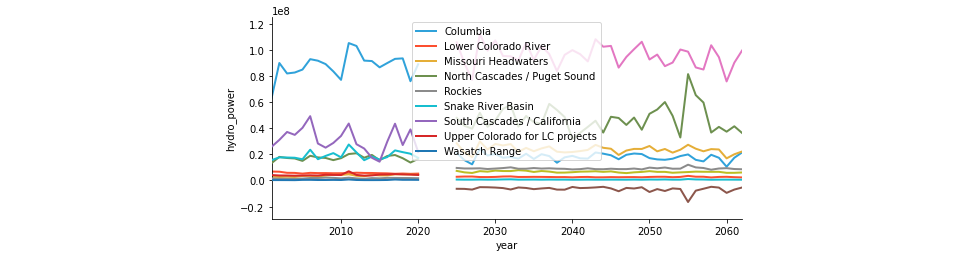

In [28]:
#attempt at combining plots
rect_plot*wrf_plot

In [29]:
#grpahign future generation by region 
%matplotlib inline

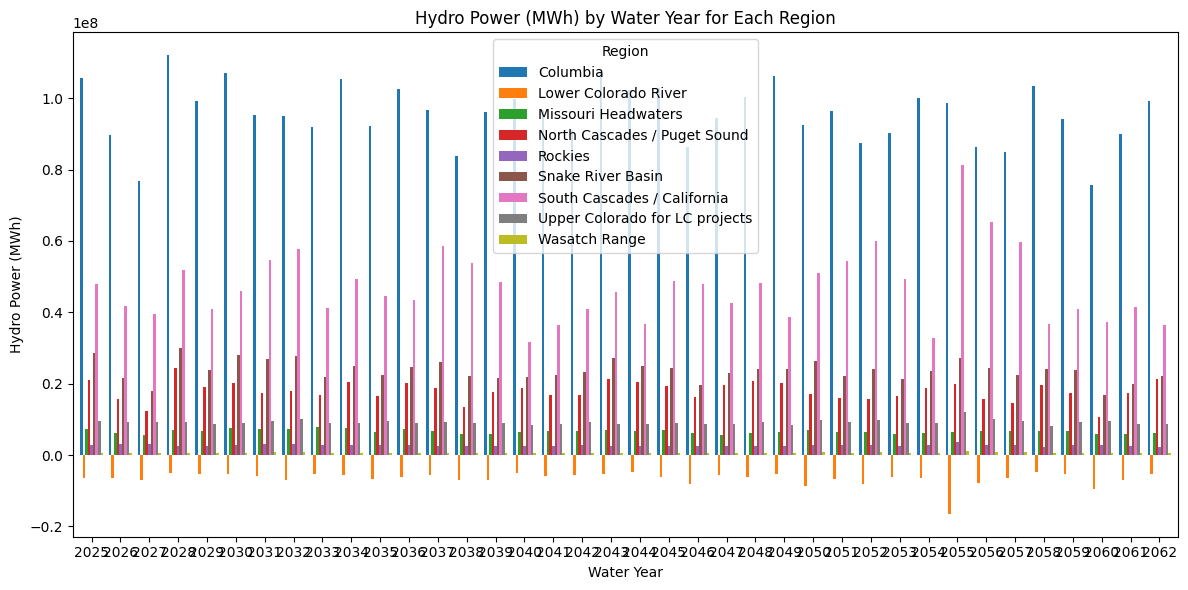

In [30]:
# Concatenate all DataFrames into a single DataFrame and create a 'region' column
combined_df = pd.concat(
    [df.assign(region=region) for region, df in region_dfs.items()],
    ignore_index=True
)

# Pivot to structure the DataFrame for grouped bar plot with regions as columns
pivoted_df = combined_df.pivot(index='water_year', columns='region', values='hydro_power (MWh)')

# Plotting
ax = pivoted_df.plot(kind='bar', figsize=(12, 6), width=0.8)

# Stylize plot with labels and title
plt.title('Hydro Power (MWh) by Water Year for Each Region')
plt.xlabel('Water Year')
plt.ylabel('Hydro Power (MWh)')
plt.xticks(rotation=0)  # Rotates X-axis labels to horizontal
plt.legend(title='Region')

# Show the plot
plt.tight_layout()
plt.show()

### Step 8. Disaggreagting Annual Predictions into Months 

##### finding median monthly splits 

In [31]:
# Initialize the region_medians_df DataFrame with the appropriate columns
region_medians_df = pd.DataFrame(columns=[str(num) for num in [10,11,12,1,2,3,4,5,6,7,8,9]])

for region in combined_df['region'].unique():
    monthly_fraction = np.divide(dr_region_total_gen.sel(dr_region=region).to_pandas().loc[slice('2001-10','2020-09')].to_numpy().reshape((-1,12)).T,
                             dr_region_annual_gen.sel(dr_region=region).values[1:]).T

    monthly_fraction_df = pd.DataFrame(monthly_fraction,columns=[str(num) for num in [10,11,12,1,2,3,4,5,6,7,8,9]],
                                   index=range(2001,2020))
    median_values = monthly_fraction_df.median().values.reshape(1,-1)
    
    # Add the median values as a row in the region_medians_df DataFrame
    region_medians_df.loc[region] = median_values.flatten()
#region_medians_df

##### getting calendar year monthly of generation for regions 

In [32]:
# We will use a dictionary to track data over regions and calendar years.
# Each entry in the dictionary will be a (region, year) tuple key pointing to a list of monthly values.
calendar_monthly_data = {}

# Loop over each unique region and water_year to populate the calendar_monthly_data dictionary
for region in combined_df['region'].unique():
    
    regional_data = combined_df[combined_df['region'] == region]
    
    for index, row in regional_data.iterrows():
        water_year = row['water_year']
        annual_generation = row['hydro_power (MWh)']

        median_monthly_fractions = region_medians_df.loc[region].values
        monthly_generation_values = median_monthly_fractions * annual_generation
        
        # Break down water year into previous and current calendar years
        prev_calendar_year_data = monthly_generation_values[:3] # Oct, Nov, Dec belong to previous calendar year
        current_calendar_year_data = monthly_generation_values[3:] # Jan to Sep of current calendar year
        
        # Ensure data structures for previous and current calendar years exist
        prev_calendar_year = water_year - 1
        current_calendar_year = water_year
        
        if (region, prev_calendar_year) not in calendar_monthly_data:
            calendar_monthly_data[(region, prev_calendar_year)] = [np.nan] * 12
        if (region, current_calendar_year) not in calendar_monthly_data:
            calendar_monthly_data[(region, current_calendar_year)] = [np.nan] * 12
        
        # Assign the monthly data to the correct calendar year
        calendar_monthly_data[(region, prev_calendar_year)][9:] = prev_calendar_year_data # October (9) to December (11) indexes
        calendar_monthly_data[(region, current_calendar_year)][:9] = current_calendar_year_data # January (0) to September (8) indexes


# Create a DataFrame from the dictionary
data_rows = []
for (region, year), months_data in calendar_monthly_data.items():
    data_rows.append([region, year] + months_data)

# Define columns for the final DataFrame
columns = ['region', 'year'] + [str(month) for month in range(1, 13)]

# Create the final DataFrame
final_df = pd.DataFrame(data_rows, columns=columns)

# Pivot the DataFrame to put regions as columns and create multiindex (year, month) as rows
final_df = final_df.melt(id_vars=['region', 'year'], var_name='month', value_name='generation')
final_df['date'] = pd.to_datetime(final_df['year'].astype(str) + final_df['month'].astype(str), format='%Y%m')
final_df.set_index(['date', 'region'], inplace=True)
final_df = final_df.unstack('region')['generation']

# Display the final DataFrame
#final_df

In [33]:
final_df.to_csv(f'{gcm_name}24-63_dr_regions_hydro.csv')

##### getting calendar year monthly of generation for plant IDs

In [34]:
# Prepare a list to store the DataFrames for each EIA_ID
monthly_gen_list = []

final_df.index = pd.to_datetime(final_df.index)

# Iterate over the rows in the plant_fractions DataFrame
for index, row in plant_fractions.iterrows():
    eia_id = index
    dr_region = row['dr_region']
    fraction = row['EIA_fraction']

    # Check if dr_region is actually a column in dr_region_hydro
    if dr_region in final_df.columns:
        # Multiply the generation for the region by the fraction and store in a temporary DataFrame
        temp_df = final_df[[dr_region]].multiply(fraction, axis='index')
        
        # Rename the column to the EIA_ID
        temp_df.columns = [eia_id]
        
        # Append the temporary DataFrame into our list
        monthly_gen_list.append(temp_df)

# Concatenate all temporary DataFrames at once
monthly_gen_by_eia_id = pd.concat(monthly_gen_list, axis=1)

# Ensure the index is set to the dr_region_hydro index to maintain date linkage
monthly_gen_by_eia_id.index =final_df.index


# Display the resulting DataFrame
monthly_gen_by_eia_id

,34,72,152,153,154,159,161,162,180,214,...,59357,59428,60119,60418,60517,61189,61190,61191,61688,61853
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062-08-01,4849.271347,1380.807310,-92234.250287,732883.426302,-167445.020911,784.255365,511.973271,297.361565,321.297389,278.712671,...,644.824269,200.743826,568.906497,961.989296,1023.962152,1366.348902,2463.269718,1089.758842,415.458258,10217.911540
2062-09-01,4356.320105,1240.441752,-78916.807843,567294.566263,-143268.108088,571.010678,459.928780,267.133363,288.635998,250.380217,...,568.383861,180.337272,483.722352,847.950701,902.577011,1161.761217,2094.436657,926.585850,307.443981,7439.587732
2062-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### getting calendar year monthly of generation for WECC regions 

In [35]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [36]:
# Create a GeoDataFrame from plant locations
geometry = [Point(xy) for xy in zip(hydro_locs['Longitude'], hydro_locs['Latitude'])]
plants_gdf = gpd.GeoDataFrame(hydro_locs, crs="EPSG:4326", geometry=geometry) # Ensure CRS matches the shapefile

# Spatial join to assign plants to regions
plants_regions_gdf = gpd.sjoin(plants_gdf, wecc_subregions, how="left", predicate='within')
plants_regions_gdf.rename_axis('EIA_ID', inplace=True)

# Ensure EIA_IDs are strings for consistency
plants_regions_gdf.index = plants_regions_gdf.index.astype(str)
monthly_gen_by_eia_id.columns = monthly_gen_by_eia_id.columns.astype(str)

# Merge the region information with the generation data
transposed_gen = monthly_gen_by_eia_id.T.join(plants_regions_gdf[['Region_Lab']], how='left') 

# Group by region and calculate the sum of generation for each region
grouped_by_region = transposed_gen.groupby('Region_Lab').sum()

# Transpose to have dates as rows and regions as columns
grouped_by_region = grouped_by_region.T

In [37]:
grouped_by_region.to_csv(f'{gcm_name}24-63_hydro.csv')

In [38]:
grouped_by_region

Region_Lab,CAMX,Desert Southwest,NWPP Central,NWPP Northeast,NWPP Northwest
2024-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
2024-02-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
2024-03-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
2024-04-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
2024-05-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...
2062-08-01 00:00:00,2.248826e+06,335769.714970,708439.200342,581729.218118,1.006597e+07
2062-09-01 00:00:00,2.022679e+06,227458.396409,549151.241974,477658.754545,7.655501e+06
2062-10-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
2062-11-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00


# For Getting into Plant IDs for ASSETRA

In [1]:
import os
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import regionmask
import xarray as xr
import numpy as np

In [2]:
wecc_subregions = gpd.read_file(r"/nfs/turbo/seas-mtcraig/sriharis/shapefiles/WECC_subregions/WECC_subregions.shp")
drought_shapes_plantID = gpd.read_file('/nfs/turbo/seas-mtcraig/sriharis/paper2_archive/hydro_generation/drought_region_shape/Drought_region_shapes_v2_plantID.shp')

hyd = pd.read_csv(r"/nfs/turbo/seas-mtcraig/sriharis/paper2_archive/hydro_generation/RectifHyd_v1.0.1.csv",skiprows=28)

hyd['datetime'] = pd.to_datetime(hyd['year'].astype(str)+'/'+hyd['month'])

hyd = hyd.set_index(['EIA_ID','datetime'])

hydro_locs = pd.read_csv('/nfs/turbo/seas-mtcraig/sriharis/paper2_archive/hydro_generation/hydro_locs.csv',index_col='Plant Code')
hydro_locs.index=hydro_locs.index.astype(int)

# Find plants which are in both rectifhyd and wecc hydro dataset
hyd_ids = np.unique(hyd.index.get_level_values('EIA_ID'))
eia_latlon_ids = np.array(hydro_locs.index)
reqd_plants = hyd_ids[np.isin(hyd_ids,eia_latlon_ids)==True] 

from shapely.geometry import Point

def find_shape_region_coord(lon,lat,shpfile,shp_colname):
    """
    Find the shape to which a coordinate (of power plant)
    belongs

    In:
        lon : longitude (-180 to 180)
        lat : latitude
        shpfile : drought region geopandas object
        shp_colname : required name of the shape
    
    Out: 
        drought region name to which the plant belongs
    """    
    min_dist = 1e10

    for idx,polygon in enumerate(np.asanyarray(shpfile['geometry'])):
        if polygon.contains(Point(lon,lat)):
            return shpfile.iloc[idx][shp_colname]

    return 'None'
    
# Find the plants which are in the specific drought regions
# There are a couple methods, here only the methods which gives plants within the drought region shape file is used
reqd_plants_df = hydro_locs.loc[reqd_plants]
reqd_plants_df['drought_region'] = reqd_plants_df.apply(lambda x:find_shape_region_coord(x['Longitude'],
                                                                                         x['Latitude'],
                                                                                         drought_shapes_plantID,
                                                                                         'drght_r'), axis=1)
reqd_plants_df['WECC_region'] = reqd_plants_df.apply(lambda x:find_shape_region_coord(x['Longitude'],
                                                                                         x['Latitude'],
                                                                                         wecc_subregions,
                                                                                         'Region_Lab'), axis=1)

rectifhyd_ds = hyd.loc[reqd_plants][['EIA_MWh', 'RectifHyd_MWh']].to_xarray()

rectifhyd_ds = rectifhyd_ds.assign_coords({"lat":("EIA_ID",reqd_plants_df['Latitude']),
                                           "lon":("EIA_ID",reqd_plants_df['Longitude']),
                                           "dr_region":("EIA_ID",reqd_plants_df['drought_region']),
                                           "WECC_region":("EIA_ID",reqd_plants_df['WECC_region'])        
                                          }
                                         )

rectifhyd_ds_none = rectifhyd_ds.where(rectifhyd_ds['dr_region']=='None',drop=True)
rectifhyd_ds = rectifhyd_ds.where(rectifhyd_ds['dr_region']!='None',drop=True)

dr_region_total_gen = rectifhyd_ds.groupby('dr_region').sum()['RectifHyd_MWh'].rename({'datetime':'time'})
dr_region_annual_gen = dr_region_total_gen.rolling(time=12).sum().compute()
dr_region_annual_gen = dr_region_annual_gen.where(dr_region_annual_gen.time.dt.month==9,drop=True)

WECC_region_total_gen = rectifhyd_ds.groupby('WECC_region').sum()['RectifHyd_MWh'].rename({'datetime':'time'})
WECC_region_annual_gen = WECC_region_total_gen.rolling(time=12).sum().compute()
WECC_region_annual_gen = WECC_region_annual_gen.where(WECC_region_annual_gen.time.dt.month==9,drop=True)

#Want the fraction of mean generation which each plant contributes to the region over the 20 years.
plant_fractions = (rectifhyd_ds.mean('datetime').groupby('dr_region')\
                   /rectifhyd_ds.groupby('dr_region').sum().mean('datetime')).to_dataframe()
plant_fractions = plant_fractions.rename({'EIA_MWh':'EIA_fraction',
                                          'RectifHyd_MWh':'RectifHyd_fraction'},
                                         axis=1)[['EIA_fraction','RectifHyd_fraction','dr_region','WECC_region']]

rectifhyd_ds = rectifhyd_ds.rename_vars({'RectifHyd_MWh': 'hydro_power'})



/tmp/ipykernel_3352318/2597031614.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hyd['datetime'] = pd.to_datetime(hyd['year'].astype(str)+'/'+hyd['month'])


In [3]:
rectifhyd_ds

<xarray.Dataset> Size: 2MB
Dimensions:      (EIA_ID: 574, datetime: 240)
Coordinates:
  * EIA_ID       (EIA_ID) int64 5kB 34 72 152 153 ... 61190 61191 61688 61853
  * datetime     (datetime) datetime64[ns] 2kB 2001-01-01 ... 2020-12-01
    lat          (EIA_ID) float64 5kB 39.13 34.01 35.2 36.94 ... 38.4 43.05 40.6
    lon          (EIA_ID) float64 5kB -121.0 -118.4 -114.6 ... -114.6 -111.4
    dr_region    (EIA_ID) object 5kB 'South Cascades / California' ... 'Wasat...
    WECC_region  (EIA_ID) object 5kB 'CAMX' 'CAMX' ... 'NWPP Central'
Data variables:
    EIA_MWh      (EIA_ID, datetime) float64 1MB 1.014e+03 ... 3.492e+03
    hydro_power  (EIA_ID, datetime) float64 1MB 4.05e+03 4.949e+03 ... 2.051e+03

In [4]:
rectif = rectifhyd_ds['hydro_power']


In [5]:
rectif

<xarray.DataArray 'hydro_power' (EIA_ID: 574, datetime: 240)> Size: 1MB
array([[  4050.2725,   4948.6985,   5820.7306, ...,   3064.8458,
          3051.9063,   3009.5854],
       [   621.7215,    736.767 ,    593.5462, ...,         nan,
                nan,         nan],
       [ 78214.6858, 109859.4707, 108532.5128, ...,  89820.9314,
         71603.0926,  63004.7026],
       ...,
       [        nan,         nan,         nan, ...,    724.1479,
           616.8427,    510.9222],
       [        nan,         nan,         nan, ...,    398.1691,
           345.3262,    328.8733],
       [        nan,         nan,         nan, ...,   3660.4536,
          2113.9772,   2050.9762]])
Coordinates:
  * EIA_ID       (EIA_ID) int64 5kB 34 72 152 153 ... 61190 61191 61688 61853
  * datetime     (datetime) datetime64[ns] 2kB 2001-01-01 ... 2020-12-01
    lat          (EIA_ID) float64 5kB 39.13 34.01 35.2 36.94 ... 38.4 43.05 40.6
    lon          (EIA_ID) float64 5kB -121.0 -118.4 -114.6 ... -114.6 -111.4
    dr_region    (EIA_ID) object 5kB 'South Cascades / California' ... 'Wasat...
    WECC_region  (EIA_ID) object 5kB 'CAMX' 'CAMX' ... 'NWPP Central'

In [43]:
len(rectif['EIA_ID'].values)

574

In [44]:
'''
filtered_dataarray = rectif.sel(EIA_ID=rectif.WECC_region == "NWPP Northwest", datetime=slice("2019-01-01", "2019-12-31"))

# Convert the filtered DataArray to a DataFrame - keeping it in a long format (multi-index)
df_filtered = filtered_dataarray.to_dataframe()

pivoted_df = df_filtered.reset_index().pivot_table(index='datetime', columns='EIA_ID', values='hydro_power')

pivoted_df.to_csv('/nfs/turbo/seas-mtcraig-climate/Martha_Research/hydrobyid_2019_NW.csv')
'''

'\nfiltered_dataarray = rectif.sel(EIA_ID=rectif.WECC_region == "NWPP Northwest", datetime=slice("2019-01-01", "2019-12-31"))\n\n# Convert the filtered DataArray to a DataFrame - keeping it in a long format (multi-index)\ndf_filtered = filtered_dataarray.to_dataframe()\n\npivoted_df = df_filtered.reset_index().pivot_table(index=\'datetime\', columns=\'EIA_ID\', values=\'hydro_power\')\n\npivoted_df.to_csv(\'/nfs/turbo/seas-mtcraig-climate/Martha_Research/hydrobyid_2019_NW.csv\')\n'

In [45]:
final_df = pd.read_csv('/nfs/turbo/seas-mtcraig-climate/WRFDownscaled/miroc6_r1i1p1f1_ssp370_bc/miroc624-63_dr_regions_hydro.csv').set_index('date')
# Delete column Lowe CO column 
final_df.drop('Lower Colorado River', axis=1, inplace=True)

In [46]:
final_df

,Columbia,Missouri Headwaters,North Cascades / Puget Sound,Rockies,Snake River Basin,South Cascades / California,Upper Colorado for LC projects,Wasatch Range
date,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2062-08-01,7.327461e+06,563319.392439,1.188796e+06,205679.039941,1.683681e+06,2.418645e+06,834874.656290,86311.808289
2062-09-01,5.434897e+06,463752.004017,1.047871e+06,174882.075474,1.245944e+06,2.172778e+06,646241.733714,62843.005400
2062-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Prepare a list to store the DataFrames for each EIA_ID
monthly_gen_list = []

final_df.index = pd.to_datetime(final_df.index)

# Iterate over the rows in the plant_fractions DataFrame
for index, row in plant_fractions.iterrows():
    eia_id = index
    dr_region = row['dr_region']
    fraction = row['EIA_fraction']

    # Check if dr_region is actually a column in dr_region_hydro
    if dr_region in final_df.columns:
        # Multiply the generation for the region by the fraction and store in a temporary DataFrame
        temp_df = final_df[[dr_region]].multiply(fraction, axis='index')
        
        # Rename the column to the EIA_ID
        temp_df.columns = [eia_id]
        
        # Append the temporary DataFrame into our list
        monthly_gen_list.append(temp_df)

# Concatenate all temporary DataFrames at once
monthly_gen_by_eia_id = pd.concat(monthly_gen_list, axis=1)

# Ensure the index is set to the dr_region_hydro index to maintain date linkage
monthly_gen_by_eia_id.index =final_df.index


# Display the resulting DataFrame
monthly_gen_by_eia_id

,34,72,153,159,161,162,180,214,215,217,...,59357,59428,60119,60418,60517,61189,61190,61191,61688,61853
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062-08-01,4849.271347,1380.807310,732883.426302,784.255365,511.973271,297.361565,321.297389,278.712671,395.088156,8092.133563,...,644.824269,200.743826,568.906497,961.989296,1023.962152,1366.348902,2463.269718,1089.758842,415.458258,10217.911540
2062-09-01,4356.320105,1240.441752,567294.566263,571.010678,459.928780,267.133363,288.635998,250.380217,354.925586,7269.530122,...,568.383861,180.337272,483.722352,847.950701,902.577011,1161.761217,2094.436657,926.585850,307.443981,7439.587732
2062-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
monthly_gen_by_eia_id.index = pd.to_datetime(monthly_gen_by_eia_id.index)
# Convert the DataFrame to an xarray DataArray
monthly_expected_generation_xr = monthly_gen_by_eia_id.to_xarray()
# Extract month and year from the date index
monthly_expected_generation_xr['month'] = ('time', monthly_expected_generation_xr['date.month'].data)
monthly_expected_generation_xr['year'] = ('time', monthly_expected_generation_xr['date.year'].data)
# Reshape for multi-dimensional indexing
monthly_expected_generation_xr = monthly_expected_generation_xr.rename({'date': 'time'})
#limit time for now 
monthly_expected_generation_xr = monthly_expected_generation_xr.isel(time = slice(20, 32))
#hydro plant id list 
hydro_ids = list(monthly_expected_generation_xr.data_vars.keys())

In [50]:
len(hydro_ids)

563

In [49]:
monthly_gen_by_eia_id.to_csv('/nfs/turbo/seas-mtcraig-climate/WRFDownscaled/miroc6_r1i1p1f1_ssp370_bc/miroc6_hydro_byid.csv') 

## Old

In [24]:
total_capacity_by_region = reqd_plants_df.groupby('WECC_region')['Nameplate Capacity (MW)'].sum()
monthly_total_capacity_by_region = total_capacity_by_region * 730

In [25]:
regional_hydro = pd.read_csv('/nfs/turbo/seas-mtcraig-climate/WRFDownscaled/taiesm1_r1i1p1f1_ssp370_bc/tai24-63_hydro.csv')
# Rename the first column (usually the unnamed column in the CSV file)
regional_hydro.rename(columns={regional_hydro.columns[0]: 'Time'}, inplace=True)

In [26]:
regional_hydro

,Time,CAMX,Desert Southwest,NWPP Central,NWPP Northeast,NWPP Northwest
0,2024-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
1,2024-02-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
2,2024-03-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
3,2024-04-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
4,2024-05-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...
463,2062-08-01 00:00:00,2.756077e+06,814628.389232,771344.657294,512303.497658,9.804298e+06
464,2062-09-01 00:00:00,2.475909e+06,631556.847288,599076.565920,420471.303164,7.469510e+06
465,2062-10-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
466,2062-11-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00


In [27]:
# Set 'Unnamed: 0' as the index
regional_hydro.set_index('Time', inplace=True)

# Convert index to datetime for better manipulation
regional_hydro.index = pd.to_datetime(regional_hydro.index)

# Create a DataFrame from the total_capacity_by_region
total_cap_df = pd.Series(total_capacity_by_region)

# Calculate the capacity factor by dividing each column by the total capacity in that region
capacity_factor_df = regional_hydro.div(total_cap_df, axis=1)

# Print the resulting capacity factor DataFrame
print(capacity_factor_df)

                  CAMX  Desert Southwest  NWPP Central  NWPP Northeast  \
Time                                                                     
2024-01-01    0.000000          0.000000      0.000000        0.000000   
2024-02-01    0.000000          0.000000      0.000000        0.000000   
2024-03-01    0.000000          0.000000      0.000000        0.000000   
2024-04-01    0.000000          0.000000      0.000000        0.000000   
2024-05-01    0.000000          0.000000      0.000000        0.000000   
...                ...               ...           ...             ...   
2062-08-01  276.071500        212.203597    398.051738      428.311594   
2062-09-01  248.007533        164.515056    309.152939      351.535242   
2062-10-01    0.000000          0.000000      0.000000        0.000000   
2062-11-01    0.000000          0.000000      0.000000        0.000000   
2062-12-01    0.000000          0.000000      0.000000        0.000000   

            NWPP Northwest  
Time    

In [28]:
capacity_factor_df.to_csv('/nfs/turbo/seas-mtcraig-climate/WRFDownscaled/taiesm1_r1i1p1f1_ssp370_bc/monthly_hydro_cfs.csv')